<a href="https://colab.research.google.com/github/joccy-code/Multi-LinearRegression--Model/blob/main/Lab03_Multi_LinearRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`2. Multiple-LinearRegression Model-01`**


*   `Problem Statement:` A medium-sized distribution company wants to develop a multiple linear regression model to predict its monthly revenue based on operational expenses and marketing efforts. The company has collected 500 months of historical data, recording the following variables each month: transportation cost, stationery cost, packaging cost, advertising cost, and employee salaries, along with the corresponding revenue generated. Your task is to build a multiple linear regression model. After fitting the model, you should evaluate the impact of each variable on revenue, interpret the regression coefficients, assess model accuracy using metrics such as R² and MSE, and use the model to predict revenue for new input values. `Inline code`
    * Model formula: yy=a0​+a1​x1​+a2​x2​+⋯+an​xn​
    * Where: x1,x2,x3 -->Independet variable
    * y--> Dependent variable
    * a1,a2,a3--an-> coefficients/slope/weghts
    * a0-->constant/bais

`*   Step-1; Import Necessary Labraries`

In [ ]:
import pandas as pd

*   `Step-2: Import/loaad the dataset`

In [ ]:
data=pd.read_csv("revenue_prediction.csv")

*   `Step-3: Dataset description/ Quick data check`
*   `*Imortant Note:*`
    * Dataset descriptions/ quick data check-Help you understand the structure, size, and quality of your dataset before doing machine learning.
*   `data`
    * Displays the entire dataset (all rows and columns).
    * Not recommended for large datasets because it prints everything.
*   `data.head()`
    * Shows the first 5 rows of the dataset.
    * You can also specify the number: data.head(10).
    * Used to preview how your data looks (columns, sample values).
*   `data.tail()`
    * Shows the last 5 rows of the dataset.
    * Aims: To check the end of the dataset and confirm data consistency.
*   `data.info()`
    * Shows important information such as:
      * Column names, Data types (int, float, object…), Number of non-null values,Memory usage
    * Helps understand data types and missing values.
*   `data.shape`
   * Returns the shape of the dataset as:
   * (number_of_rows, number_of_columns)
   * Exa: (500, 12) → 500 rows and 12 columns.
   * Aims: To know dataset size.
*   `data.isna().sum()`
    * Checks how many missing values (NA) are in each column.
    * Detect missing values to decide cleaning steps
*  `data.isnull().count()`
    * Counts the total number of values (null + not-null) in each column.
    * Note: isnull().count() does NOT count the missing values.
    * It counts how many entries exist in each column.
* `Note: Difference Between isna() and isnull()`
    * They are the same in pandas.
    * isna() ≡ isnull()
    * notna() ≡ notnull()



In [ ]:
data

,Transportation,Stationery,Packaging,Advertising,Employee_Salaries,Revenue
0,2248.36,346.31,639.94,1233.51,4459.86,102665.67
1,1930.87,395.47,592.46,834.64,4884.39,103566.63
2,2323.84,230.07,505.96,754.54,4366.06,91850.34
3,2761.51,328.15,435.31,998.99,4753.63,102639.39
4,1882.92,267.47,569.82,948.94,3485.11,78141.49
...,...,...,...,...,...,...
495,2269.46,285.94,700.61,1321.05,5650.56,120577.54
496,1481.38,389.88,706.15,992.04,4776.83,101027.34
497,1904.83,332.04,620.84,735.44,4776.19,95795.88
498,1562.19,271.44,602.41,951.08,5632.30,111910.44


In [ ]:
data.head()

,Transportation,Stationery,Packaging,Advertising,Employee_Salaries,Revenue
0,2248.36,346.31,639.94,1233.51,4459.86,102665.67
1,1930.87,395.47,592.46,834.64,4884.39,103566.63
2,2323.84,230.07,505.96,754.54,4366.06,91850.34
3,2761.51,328.15,435.31,998.99,4753.63,102639.39
4,1882.92,267.47,569.82,948.94,3485.11,78141.49


In [ ]:
data.tail()

,Transportation,Stationery,Packaging,Advertising,Employee_Salaries,Revenue
495,2269.46,285.94,700.61,1321.05,5650.56,120577.54
496,1481.38,389.88,706.15,992.04,4776.83,101027.34
497,1904.83,332.04,620.84,735.44,4776.19,95795.88
498,1562.19,271.44,602.41,951.08,5632.30,111910.44
499,1308.60,328.63,559.25,776.53,5272.04,102391.74


In [ ]:
data.shape

(500, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transportation     500 non-null    float64
 1   Stationery         500 non-null    float64
 2   Packaging          500 non-null    float64
 3   Advertising        500 non-null    float64
 4   Employee_Salaries  500 non-null    float64
 5   Revenue            500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [ ]:
data.describe()

,Transportation,Stationery,Packaging,Advertising,Employee_Salaries,Revenue
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,2003.419280,301.591200,510.848460,1009.956340,4990.78690,104147.445100
std,490.626716,48.900041,101.024709,295.219751,767.65301,12175.618029
min,379.370000,165.160000,210.370000,117.880000,2584.39000,67908.980000
25%,1649.847500,270.235000,439.755000,816.420000,4471.40750,96078.190000
50%,2006.400000,301.430000,511.980000,997.325000,4997.47500,103961.625000
75%,2318.392500,332.562500,575.470000,1209.932500,5535.33750,112177.662500
max,3926.370000,431.620000,760.170000,1957.930000,7487.93000,137234.920000


In [ ]:
data.isna().sum()

,0
Transportation,0
Stationery,0
Packaging,0
Advertising,0
Employee_Salaries,0
Revenue,0


In [ ]:
data.isnull().count()

,0
Transportation,500
Stationery,500
Packaging,500
Advertising,500
Employee_Salaries,500
Revenue,500


`Step-4: Define Features (X) and Target (y)`

In [ ]:
X = data[['Transportation', 'Stationery', 'Packaging',
          'Advertising', 'Employee_Salaries']]
y = data['Revenue']

`Step 5: Split Data into Train and Test Sets`

In [ ]:
#Import labraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

* `Step 6: Build and Train the Multiple Linear Regression Model`

In [ ]:
#Import Labraries
from sklearn.linear_model import LinearRegression
#Creating a Linear Regression Object
model=LinearRegression()
#Fitting the dataset #x needs to be 2D-arrays
#model.fit(x,y)
model.fit(X_train, y_train)

LinearRegression()

`Step 7: Check Regression Coefficients`

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print("Intercept:", model.intercept_)

             Feature  Coefficient
0     Transportation     5.043470
1         Stationery    12.006543
2          Packaging     8.443569
3        Advertising    12.356817
4  Employee_Salaries    14.959435
Intercept: -1036.7271228930622


* `Note: Interpretation`
   * A positive coefficient → increases revenue
   * A negative coefficient → reduces revenue
   * Larger absolute value → stronger impact

*   `**Importants Note **`
1. coefficients = pd.DataFrame({ ... })`
    * coefficients → A variable that will store a table (DataFrame).
    * pd.DataFrame({...}) → Creates a DataFrame using pandas.
    * Inside the {...} dictionary you define two columns:
    * NB:`A DataFrame` is a 2-D labeled data structure that allows you to store and manipulate tabular data
* `'Feature': X.columns`
    * Feature: The names of your independent variables (e.g., transportation, advertising).
    * X.columns retrieves all column names from your input dataset.
*  `'Coefficient': model.coef_'`
    * Coefficient: The numerical effect of each feature on the predicted revenue.
    * model.coef_ is the array of coefficients learned by the linear regression model.
2. `print(coefficients)`
    * prints the DataFrame created above
3. print("Intercept:", model.intercept_)` `Inline code`
    * Prints the intercept of the regression equation.
   * model.intercept_ is the constant term (b₀) in the regression line.
*   `y=a0​+a1​x1​+a2​x2​+⋯+an​xn​`
   * Intercept (b₀) means:
   * Here, the predicted revenue when all input variables are zero.

`Step 8: Predict on Test Data`

In [ ]:
y_pred = model.predict(X_test)

*   Note:
   * model-This is your trained ML model
(e.g., LinearRegression()).
   * .predict() -This function is used to generate predictions after training.
   * X_test -This is the test input data — the data the model has never seen before.
  * It contains only the independent variables (features).
  * y_pred -This will store the predicted values made by the model.

*   `Why is this important?`
    * It checks model performance on unseen data
    * Helps you calculate accuracy metrics (R², MSE, RMSE)
    * Shows how well the model generalizes

`Step 9: Evaluate Model Performance`

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# 4. R-squared (Coefficient of Determination)
#R² Score (Goodness of Fit)
r2 = r2_score(y_test, y_pred)
# 5. Adjusted R-squared
n = len(y_test)           # number of observations
k = X_test.shape[1]       # number of features
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# 6. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# Print results
print("Model Evaluation Metrics:")
print("--------------------------")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse,  2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2,  3))
print("Adjusted R-squared:", round(adjusted_r2, 3))
print("Mean Absolute Percentage Error (MAPE):", round(mape,2), "%")


Model Evaluation Metrics:
--------------------------
Mean Absolute Error (MAE): 1722.37
Mean Squared Error (MSE): 4646402.6
Root Mean Squared Error (RMSE): 2155.55
R-squared (R²): 0.961
Adjusted R-squared: 0.959
Mean Absolute Percentage Error (MAPE): 1.68 %


*  *` Interpretation:`*
    * R² = 1 → perfect model
    * R² ≥ 0.7 → good
    * R² 0.4–0.7 → moderate
    * R² < 0.4 → weak model

`Step 10: Visual Comparison (Actual vs Predicted)`

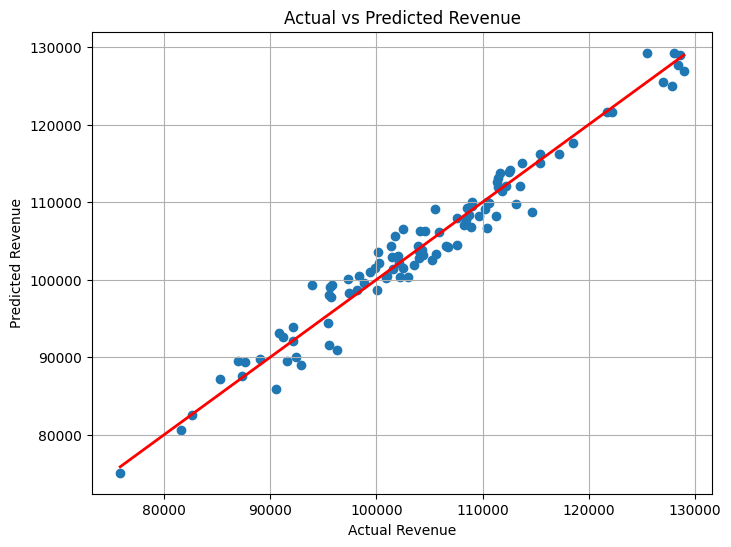

In [ ]:
#Import labraries
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.grid(True)
plt.show()

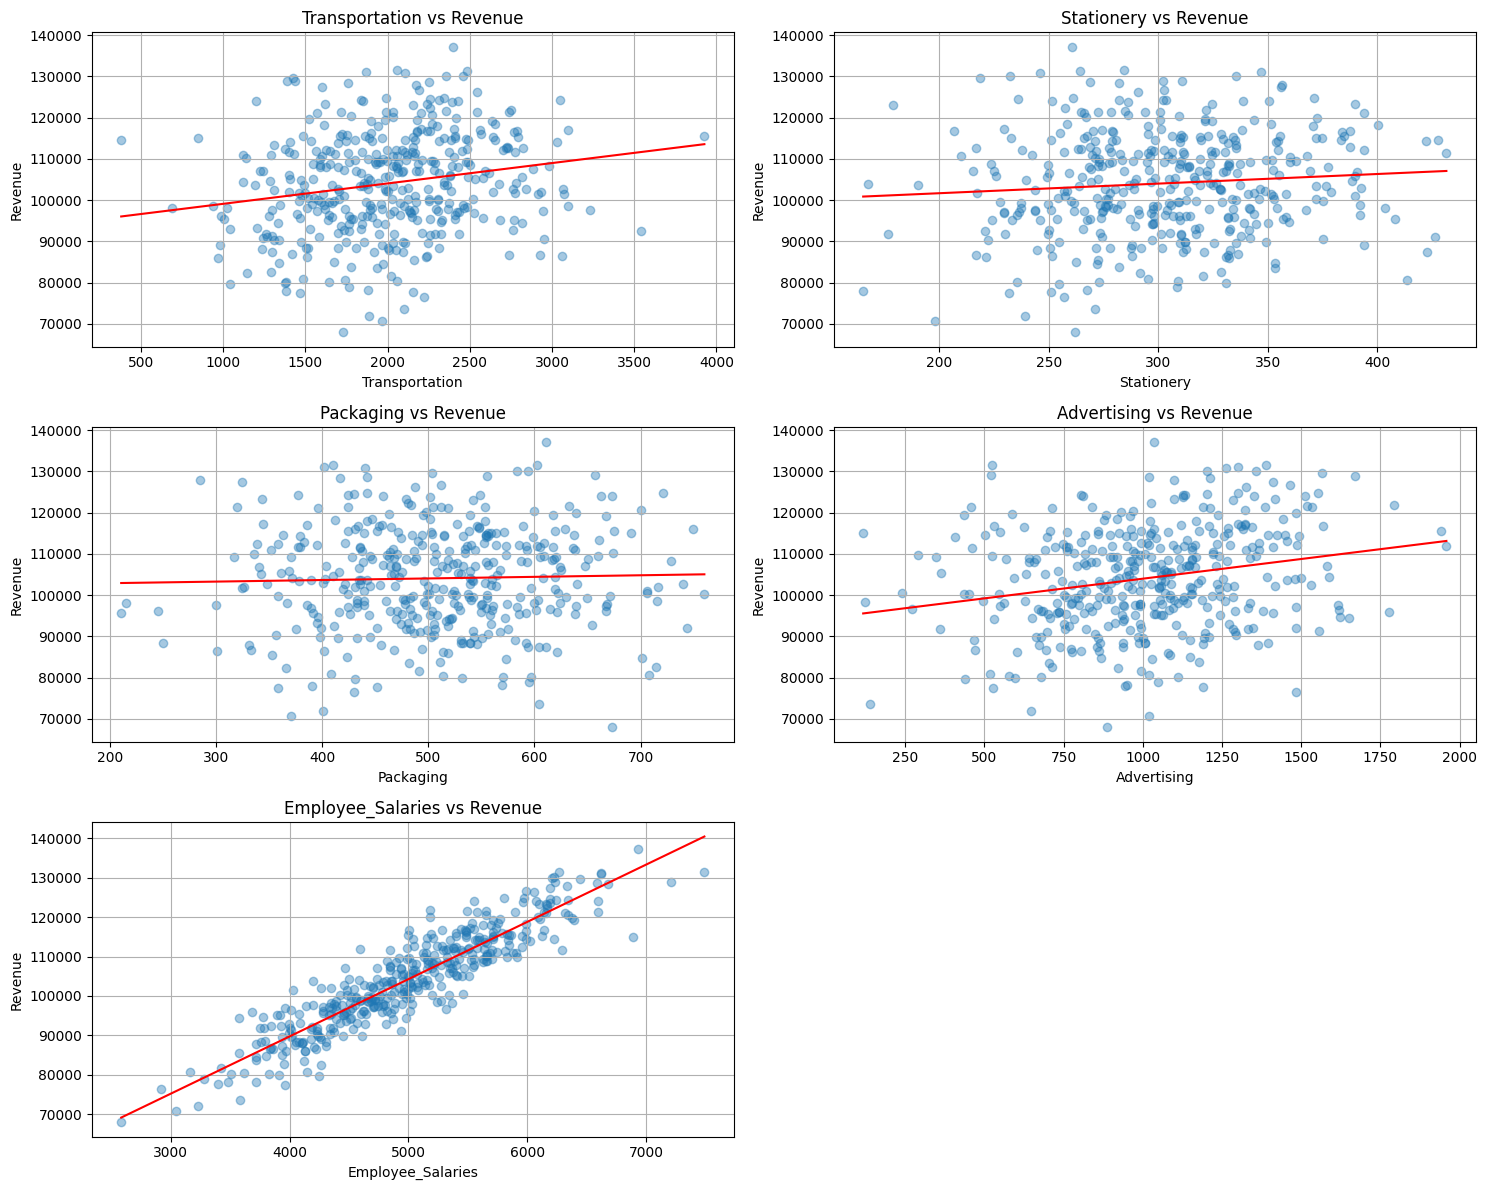

In [ ]:
features = ['Transportation', 'Stationery', 'Packaging',
            'Advertising', 'Employee_Salaries']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    x = X_train[feature]
    y = y_train
    model_single = LinearRegression()
    model_single.fit(x.values.reshape(-1, 1), y)
    x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_line = model_single.predict(x_line)
    plt.scatter(x, y, alpha=0.4)
    plt.plot(x_line, y_line, color="red")
    plt.title(f'{feature} vs Revenue')
    plt.xlabel(feature)
    plt.ylabel("Revenue")
    plt.grid(True)
plt.tight_layout()
plt.show()


`Step 11: Predict Revenue for New Input Values`

*   Example:
    * Transportation = 45000  
    * Stationery = 3500  
    * Packaging = 9000
    * Advertising= 15000  
    * Employee_Salaries = 120000  

In [ ]:
new_data = pd.DataFrame({
    'Transportation': [45000],
    'Stationery': [3500],
    'Packaging': [9000],
    'Advertising': [15000],
    'Employee_Salaries': [120000]
})
predicted_revenue = model.predict(new_data)
print("Predicted Monthly Revenue:", predicted_revenue[0])

Predicted Monthly Revenue: 2324418.8765916037


In [ ]:
#rounded output:
print("Predicted Monthly Revenue:", round(predicted_revenue[0], 2))

Predicted Monthly Revenue: 2324418.88


*   Note:
*   `predicted_revenue[0`]
    * Accesses the first (and only) element of the predicted array.
    * predicted_revenue is an array because scikit-learn always returns predictions as an array.